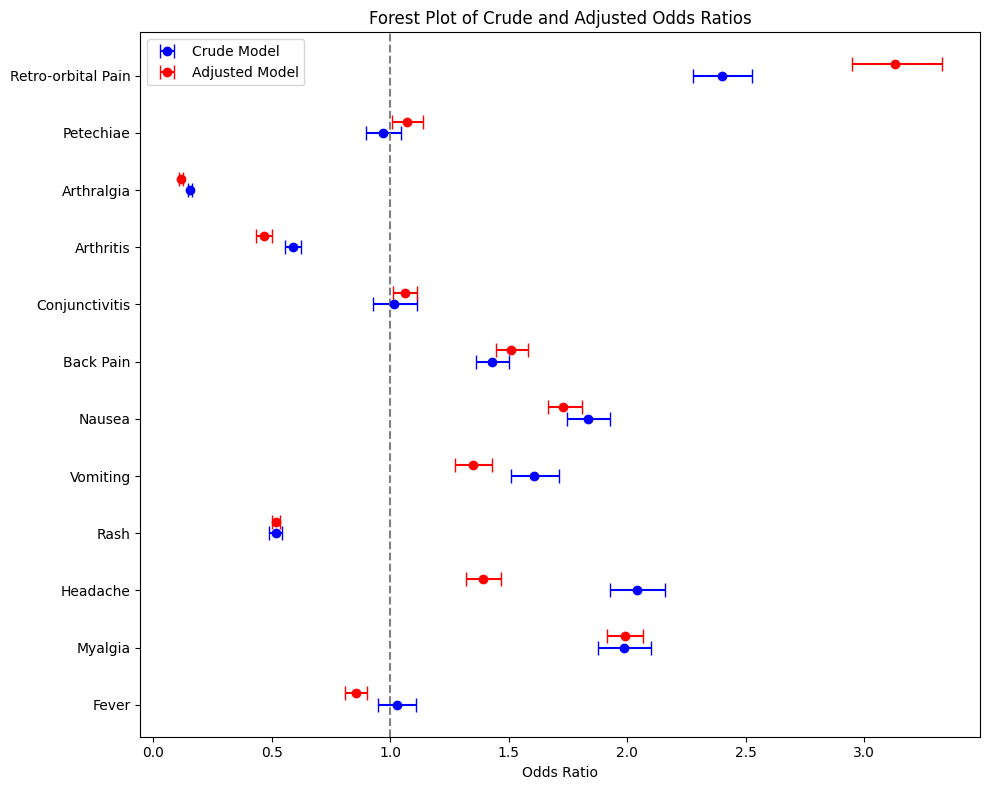

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dados do modelo bruto
bruto_data = {
    "Variable": ["Fever", "Myalgia", "Headache", "Rash", "Vomiting", "Nausea", "Back Pain", "Conjunctivitis", "Arthritis", "Arthralgia", "Petechiae", "Retro-orbital Pain"],
    "OR": [1.0263840, 1.985106, 2.039395, 0.5161387, 1.606021, 1.832453, 1.428976, 1.0161688, 0.5895263, 0.1562287, 0.9682342, 2.399212],
    "2.5%": [0.9486671, 1.874592, 1.927385, 0.4897438, 1.508233, 1.743663, 1.362178, 0.9276418, 0.5571253, 0.1484901, 0.8966354, 2.278524],
    "97.5%": [1.1095436, 2.101790, 2.157595, 0.5440173, 1.711147, 1.926157, 1.499240, 1.1145457, 0.6239349, 0.1643370, 1.0463868, 2.527008]
}

# Dados do modelo ajustado (incluindo Febre)
ajustado_data = {
    "Variable": ["Fever", "Myalgia", "Headache", "Rash", "Vomiting", "Nausea", "Back Pain", "Conjunctivitis", "Arthritis", "Arthralgia", "Petechiae", "Retro-orbital Pain"],
    "OR": [0.856, 1.99, 1.39, 0.518, 1.35, 1.73, 1.51, 1.06, 0.466, 0.116, 1.07, 3.13],
    "2.5%": [0.810, 1.915, 1.319, 0.501, 1.275, 1.665, 1.444, 1.01, 0.433, 0.107, 1.007, 2.95],
    "97.5%": [0.902, 2.067, 1.465, 0.535, 1.429, 1.808, 1.583, 1.112, 0.502, 0.125, 1.136, 3.327]
}

# Convertendo para DataFrame
bruto_df = pd.DataFrame(bruto_data)
ajustado_df = pd.DataFrame(ajustado_data)

# Offset para o modelo ajustado
offset = 0.2

# Calcular xerr para bruto e ajustado sem valores negativos
bruto_xerr = [bruto_df["OR"] - bruto_df["2.5%"], bruto_df["97.5%"] - bruto_df["OR"]]
ajustado_xerr = [ajustado_df["OR"] - ajustado_df["2.5%"], ajustado_df["97.5%"] - ajustado_df["OR"]]

# Garantir que não haja valores negativos em xerr
bruto_xerr = np.clip(bruto_xerr, 0, None)
ajustado_xerr = np.clip(ajustado_xerr, 0, None)

# Plotando o forest plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotando os pontos e linhas de confiança do modelo bruto
ax.errorbar(bruto_df["OR"], np.arange(len(bruto_df["OR"])), xerr=bruto_xerr,
            fmt='o', color='blue', label='Crude Model', capsize=5)

# Plotando os pontos e linhas de confiança do modelo ajustado com leve deslocamento
ax.errorbar(ajustado_df["OR"], np.arange(len(ajustado_df["OR"])) + offset, xerr=ajustado_xerr,
            fmt='o', color='red', label='Adjusted Model', capsize=5)

# Linha vertical em OR = 1
ax.axvline(x=1, color='gray', linestyle='--')

# Adicionando labels e título
ax.set_xlabel('Odds Ratio')
ax.set_yticks(np.arange(len(bruto_df["Variable"])))
ax.set_yticklabels(bruto_df["Variable"])
ax.set_title('Forest Plot of Crude and Adjusted Odds Ratios')
ax.legend()

# Ajustando o layout
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum itera

Métricas com SMOTE:
                        Accuracy   AUC-ROC  Recall Dengue (Sensitivity)  \
Random Forest           0.772412  0.794632                     0.805737   
Gradient Boosting       0.783888  0.812515                     0.822301   
Logistic Regression     0.754108  0.809401                     0.767923   
Support Vector Machine  0.770256  0.772851                     0.796402   
K-Nearest Neighbors     0.761578  0.554604                     0.976443   
Decision Tree           0.769973  0.787419                     0.801392   
Neural Network          0.773234  0.804750                     0.804582   

                        Specificity Chikungunya  PPV Dengue  NPV Chikungunya  \
Random Forest                          0.668984    0.883106         0.525967   
Gradient Boosting                      0.664665    0.883866         0.546518   
Logistic Regression                    0.711231    0.891933         0.496835   
Support Vector Machine                 0.689107    0.888275

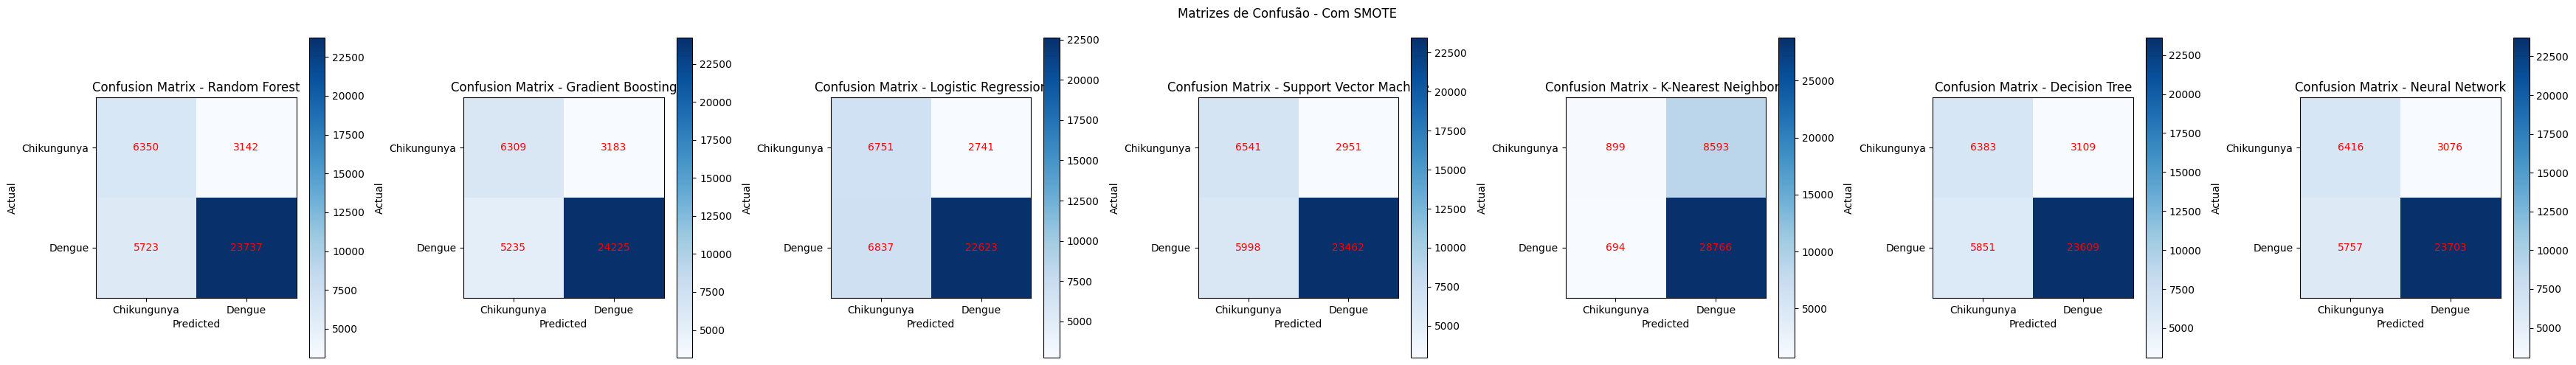

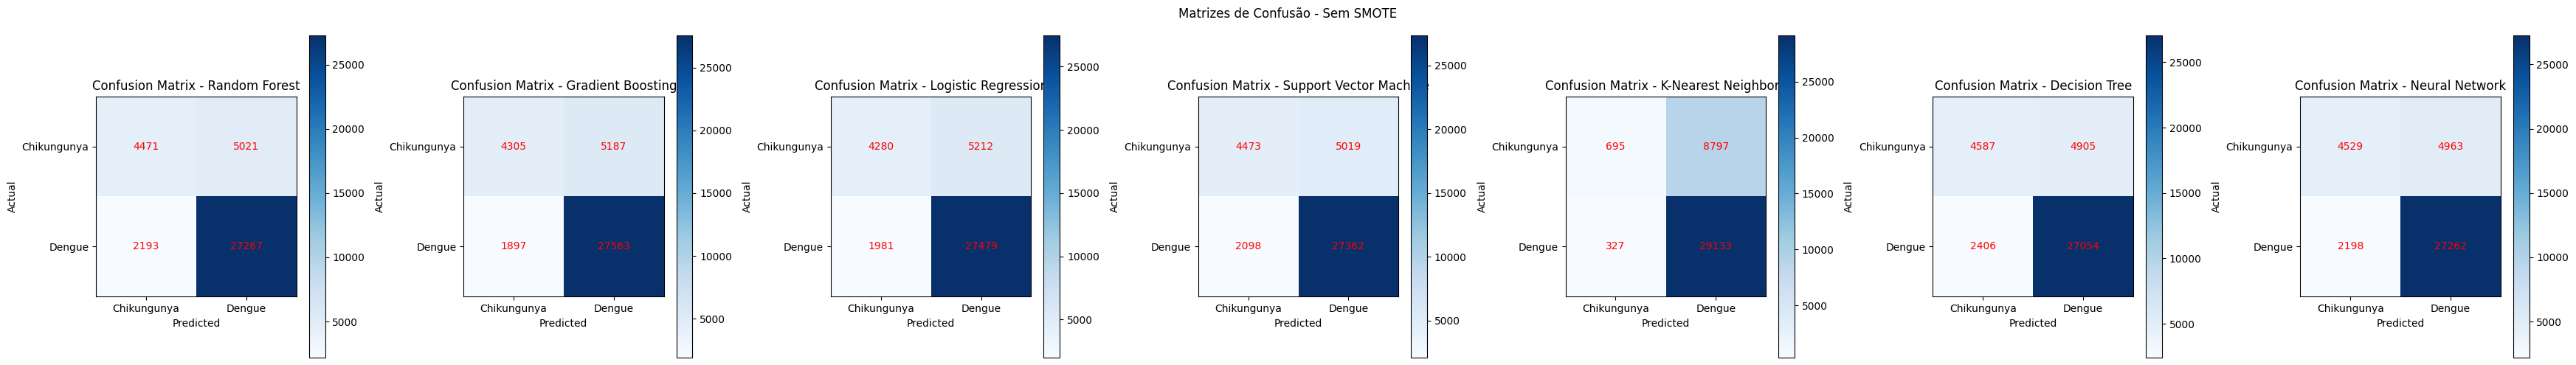

In [3]:
# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "Support Vector Machine": SVC(random_state=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Neural Network": MLPClassifier(random_state=1)
}

# Validação cruzada com k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

def evaluate_models(X, y, models, kf, smote=False):
    conf_matrices = {}
    metrics = {}

    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])

        # Previsões com validação cruzada
        y_pred = cross_val_predict(pipeline, X, y, cv=kf)
        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]

        # Matriz de confusão
        conf_matrix = confusion_matrix(y, y_pred)
        conf_matrices[name] = conf_matrix

        # Métricas para Dengue (classe 1)
        accuracy = accuracy_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_scores)
        recall_dengue = recall_score(y, y_pred, pos_label=1)
        specificity_chikungunya = recall_score(y, y_pred, pos_label=0)
        ppv_dengue = precision_score(y, y_pred, pos_label=1)
        npv_chikungunya = precision_score(y, y_pred, pos_label=0)
        f1_dengue = f1_score(y, y_pred, pos_label=1)

        # Métricas para Chikungunya (classe 0)
        recall_chikungunya = recall_score(y, y_pred, pos_label=0)
        specificity_dengue = recall_score(y, y_pred, pos_label=1)
        ppv_chikungunya = precision_score(y, y_pred, pos_label=0)
        npv_dengue = precision_score(y, y_pred, pos_label=1)
        f1_chikungunya = f1_score(y, y_pred, pos_label=0)

        metrics[name] = {
            'Accuracy': accuracy,
            'AUC-ROC': roc_auc,
            'Recall Dengue (Sensitivity)': recall_dengue,
            'Specificity Chikungunya': specificity_chikungunya,
            'PPV Dengue': ppv_dengue,
            'NPV Chikungunya': npv_chikungunya,
            'F1 Score Dengue': f1_dengue,
            'Recall Chikungunya (Sensitivity)': recall_chikungunya,
            'Specificity Dengue': specificity_dengue,
            'PPV Chikungunya': ppv_chikungunya,
            'NPV Dengue': npv_dengue,
            'F1 Score Chikungunya': f1_chikungunya
        }

    return conf_matrices, metrics

# Avaliar modelos com e sem SMOTE
conf_matrices_smote, metrics_smote = evaluate_models(X, y, models, kf, smote=True)
conf_matrices_no_smote, metrics_no_smote = evaluate_models(X, y, models, kf, smote=False)

# Combinar métricas em um DataFrame
metrics_df_smote = pd.DataFrame(metrics_smote).T
metrics_df_no_smote = pd.DataFrame(metrics_no_smote).T

# Salvar as métricas em arquivos CSV
metrics_df_smote.to_csv('metrics_smote.csv')
metrics_df_no_smote.to_csv('metrics_no_smote.csv')

# Exibir tabelas de métricas
print("Métricas com SMOTE:")
print(metrics_df_smote)
print("\nMétricas sem SMOTE:")
print(metrics_df_no_smote)

# Plotar matrizes de confusão
def plot_confusion_matrices(conf_matrices, title):
    num_models = len(conf_matrices)
    fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 5))

    if num_models == 1:
        axes = [axes]

    for i, (name, matrix) in enumerate(conf_matrices.items()):
        ax = axes[i]
        ax.imshow(matrix, cmap='Blues', interpolation='nearest')
        ax.set_title(f'Confusion Matrix - {name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Chikungunya', 'Dengue'])
        ax.set_yticklabels(['Chikungunya', 'Dengue'])
        for j in range(2):
            for k in range(2):
                ax.text(k, j, str(matrix[j, k]), ha='center', va='center', color='red')
        fig.colorbar(ax.imshow(matrix, cmap='Blues'), ax=ax, orientation='vertical')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices_smote, "Matrizes de Confusão - Com SMOTE")
plot_confusion_matrices(conf_matrices_no_smote, "Matrizes de Confusão - Sem SMOTE")

C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


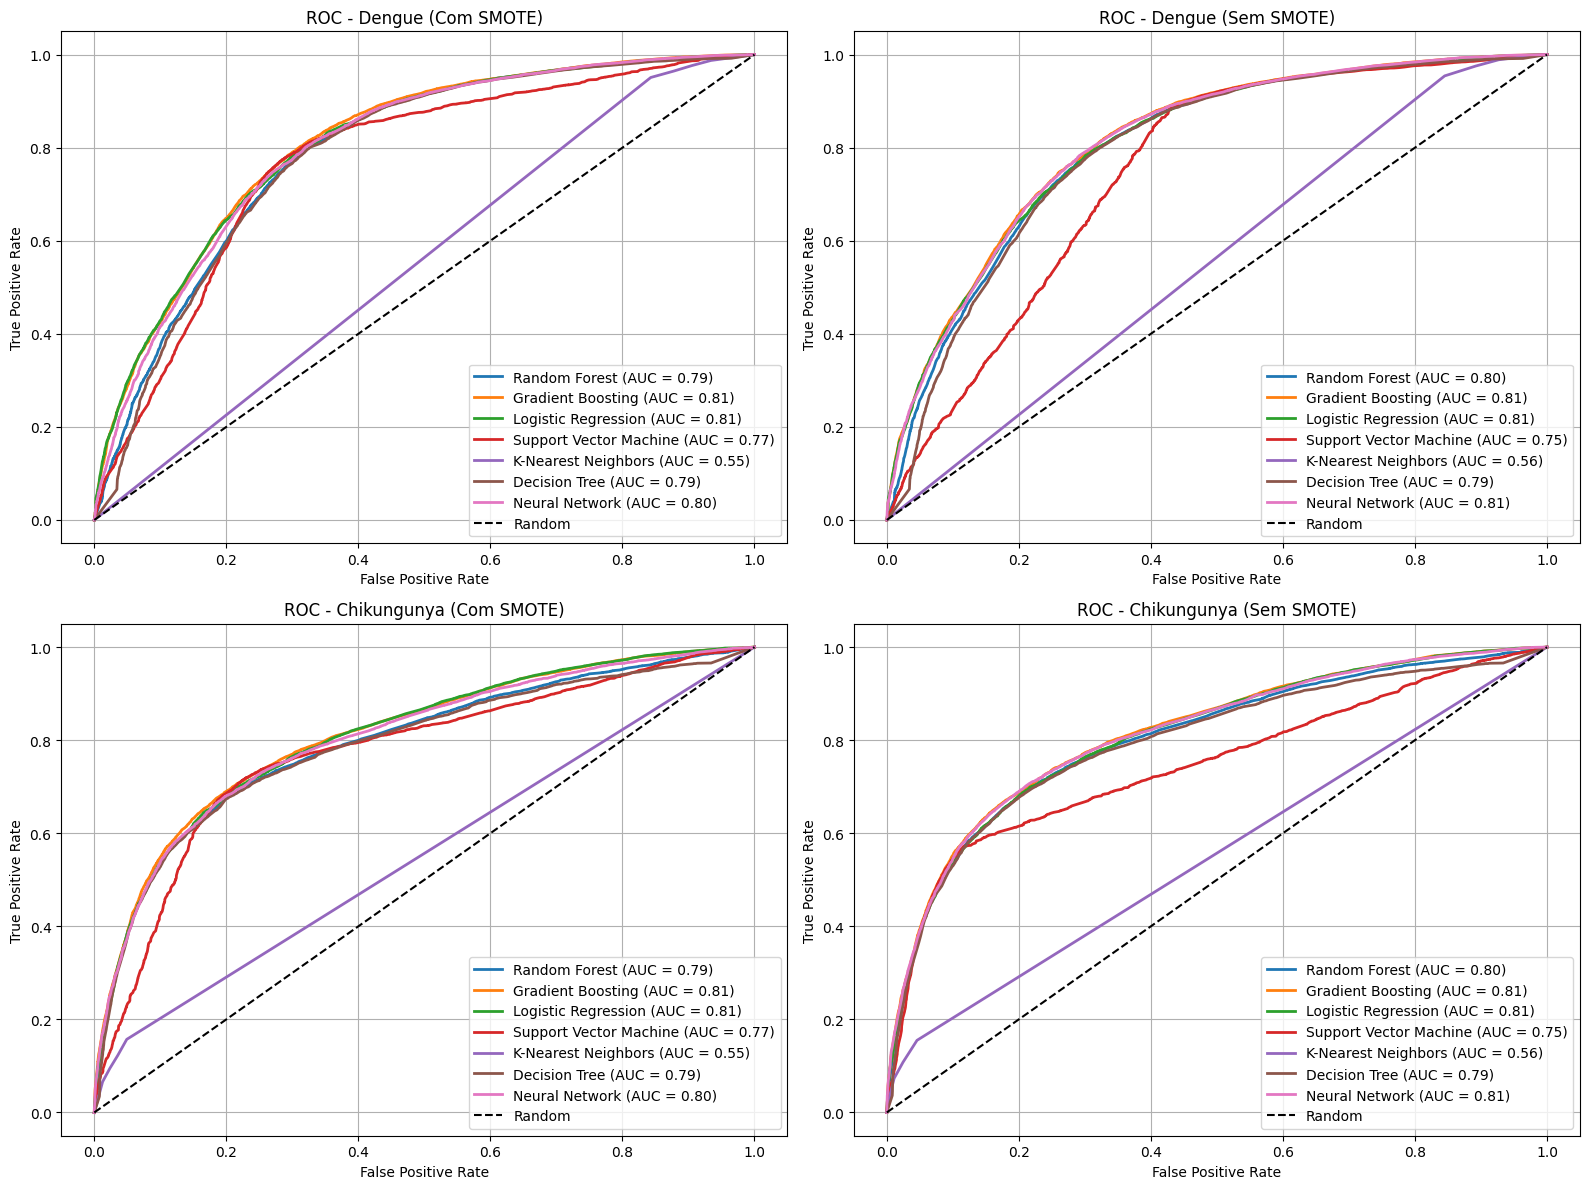

In [4]:
# Função de avaliação ROC para dengue e chikungunya
def evaluate_roc_curves(X, y, models, kf, smote):
    roc_curves_dengue = {}
    roc_curves_chikungunya = {}
    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])

        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')

        # ROC para Dengue
        fpr_dengue, tpr_dengue, _ = roc_curve(y, y_scores[:, 1], pos_label=1)
        roc_auc_dengue = auc(fpr_dengue, tpr_dengue)
        roc_curves_dengue[name] = {'fpr': fpr_dengue, 'tpr': tpr_dengue, 'auc': roc_auc_dengue}

        # ROC para Chikungunya
        fpr_chikungunya, tpr_chikungunya, _ = roc_curve(y, y_scores[:, 0], pos_label=0)
        roc_auc_chikungunya = auc(fpr_chikungunya, tpr_chikungunya)
        roc_curves_chikungunya[name] = {'fpr': fpr_chikungunya, 'tpr': tpr_chikungunya, 'auc': roc_auc_chikungunya}

    return roc_curves_dengue, roc_curves_chikungunya

roc_curves_dengue_smote, roc_curves_chikungunya_smote = evaluate_roc_curves(X, y, models, kf, smote=True)
roc_curves_dengue_no_smote, roc_curves_chikungunya_no_smote = evaluate_roc_curves(X, y, models, kf, smote=False)

# Plotar curvas ROC para Dengue e Chikungunya
plt.figure(figsize=(16, 12))

# Curvas ROC para Dengue com e sem SMOTE
plt.subplot(2, 2, 1)
for name, curve in roc_curves_dengue_smote.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Dengue (Com SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(2, 2, 2)
for name, curve in roc_curves_dengue_no_smote.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Dengue (Sem SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)

# Curvas ROC para Chikungunya com e sem SMOTE
plt.subplot(2, 2, 3)
for name, curve in roc_curves_chikungunya_smote.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Chikungunya (Com SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(2, 2, 4)
for name, curve in roc_curves_chikungunya_no_smote.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Chikungunya (Sem SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

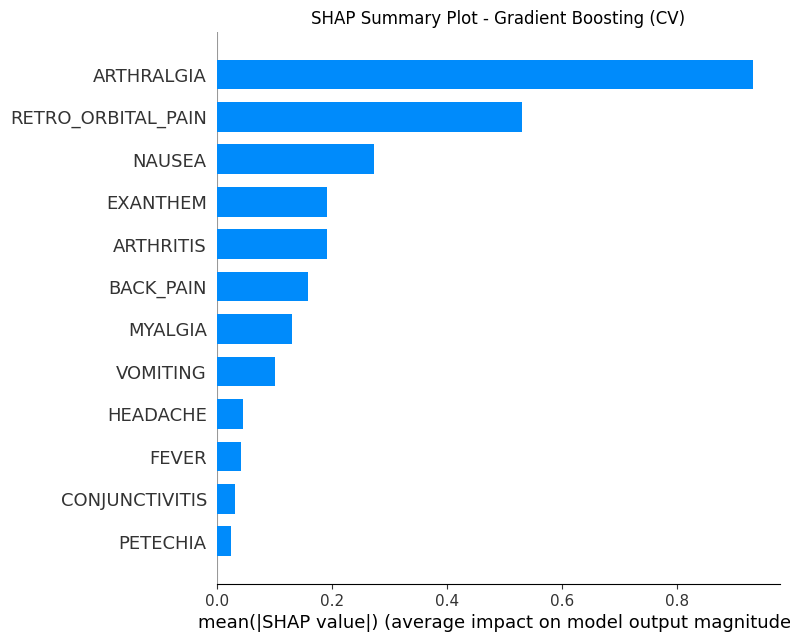

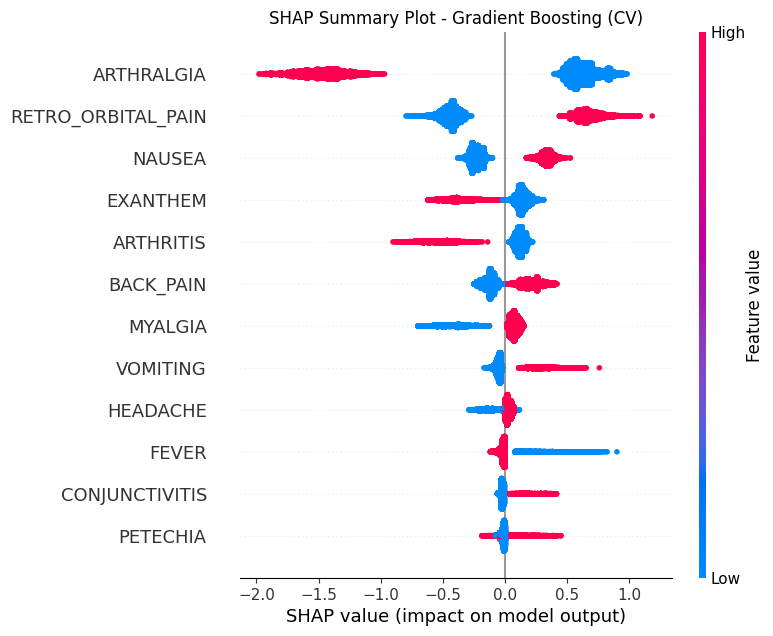

C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


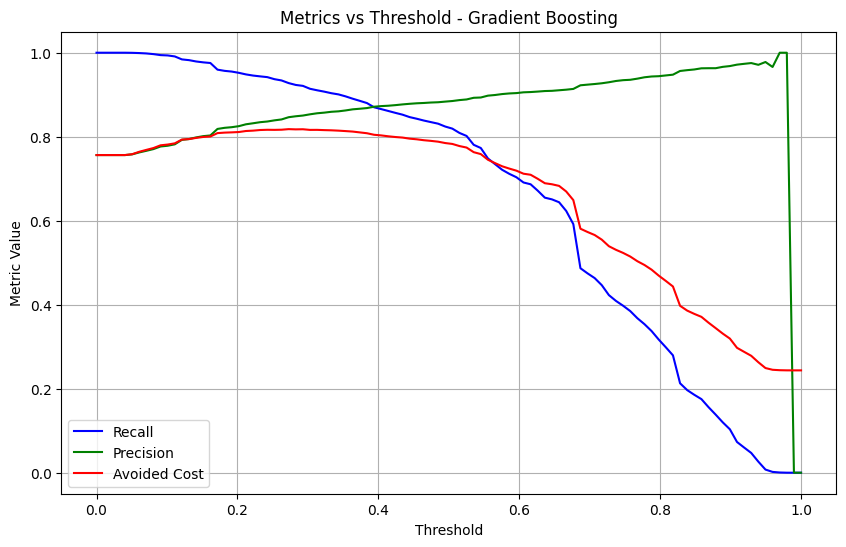

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "Support Vector Machine": SVC(random_state=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Neural Network": MLPClassifier(random_state=1)
}

# Validação cruzada com k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Função para avaliar os modelos e escolher o melhor com base na métrica AUC
def evaluate_models(X, y, models, kf, smote=False):
    model_auc_scores = {}
    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
        
        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
        auc_score = roc_auc_score(y, y_scores)
        model_auc_scores[name] = auc_score
    return model_auc_scores

# Avaliar modelos com SMOTE
model_auc_scores_smote = evaluate_models(X, y, models, kf, smote=False)

# Selecionar o melhor modelo com base na AUC
best_model_name = max(model_auc_scores_smote, key=model_auc_scores_smote.get)
best_model = models[best_model_name]

# Função para calcular os valores SHAP dentro da validação cruzada
def compute_shap_values_cv(pipeline, X, y, kf):
    shap_values_list = []
    X_test_list = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        pipeline.fit(X_train, y_train)
        explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['scaler'].transform(X_train))
        shap_values = explainer(pipeline.named_steps['scaler'].transform(X_test))
        
        shap_values_list.append(shap_values.values)
        X_test_list.append(X_test)
    
    # Concatenate SHAP values and test sets
    shap_values_all = np.concatenate(shap_values_list, axis=0)
    X_test_all = pd.concat(X_test_list, axis=0)
    
    return shap_values_all, X_test_all

# Criar o pipeline final para SHAP
pipeline_shap = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=1)),
    ('model', best_model)
])

shap_values_cv, X_test_cv = compute_shap_values_cv(pipeline_shap, X, y, kf)

# Plotar o gráfico SHAP com validação cruzada
shap.summary_plot(shap_values_cv, X_test_cv, plot_type="bar", show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()
shap.summary_plot(shap_values_cv, X_test_cv, show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()

# Função para plotar métricas vs threshold para o melhor modelo
def plot_metrics_vs_threshold(pipeline, X, y, kf):
    y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
    
    thresholds = np.linspace(0, 1, 100)
    recall_scores = []
    precision_scores = []
    avoided_cost = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall_scores.append(recall_score(y, y_pred))
        precision_scores.append(precision_score(y, y_pred))
        
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        cost = fp + fn  # Exemplary cost function: sum of false positives and false negatives
        avoided_cost.append(1 - cost / len(y))  # Assuming maximum cost is equal to the number of samples

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, recall_scores, label='Recall', color='blue')
    plt.plot(thresholds, precision_scores, label='Precision', color='green')
    plt.plot(thresholds, avoided_cost, label='Avoided Cost', color='red')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics vs Threshold - {best_model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plotar métricas vs threshold para o melhor modelo
plot_metrics_vs_threshold(pipeline_shap, X, y, kf)

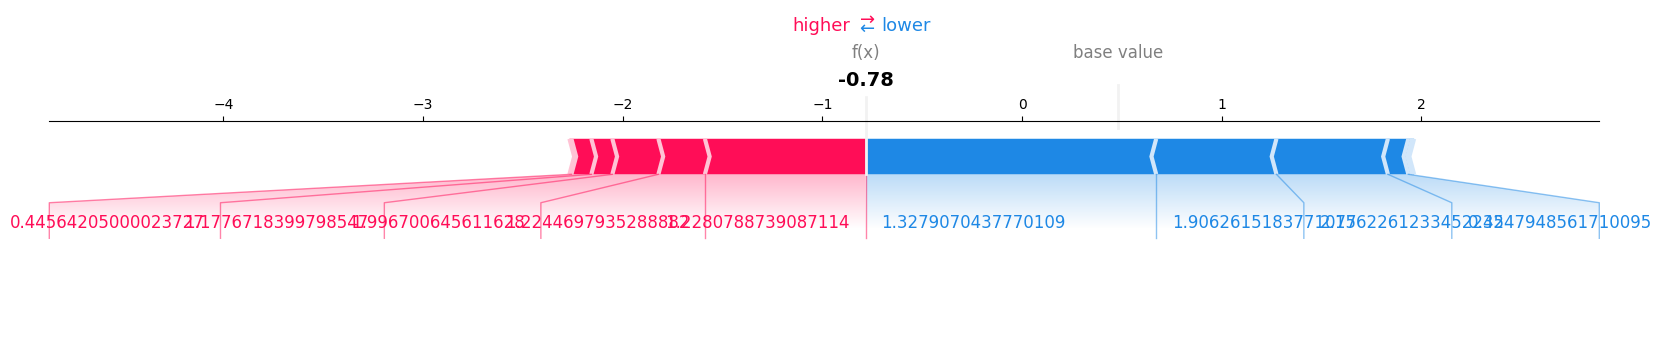

In [19]:
# Assumindo que shap_values_cv e X_test_cv já foram calculados
# Escolher uma observação específica para plotar, por exemplo, a primeira do conjunto de teste
observation_index = 0
explainer = shap.Explainer(pipeline_shap.named_steps['model'], pipeline_shap.named_steps['scaler'].transform(X))
shap_values = explainer(pipeline_shap.named_steps['scaler'].transform(X_test_cv.iloc[observation_index:observation_index+1]))

# Plotar o gráfico de força SHAP para a observação selecionada
shap.plots.force(shap_values[0], matplotlib=True)
plt.show()

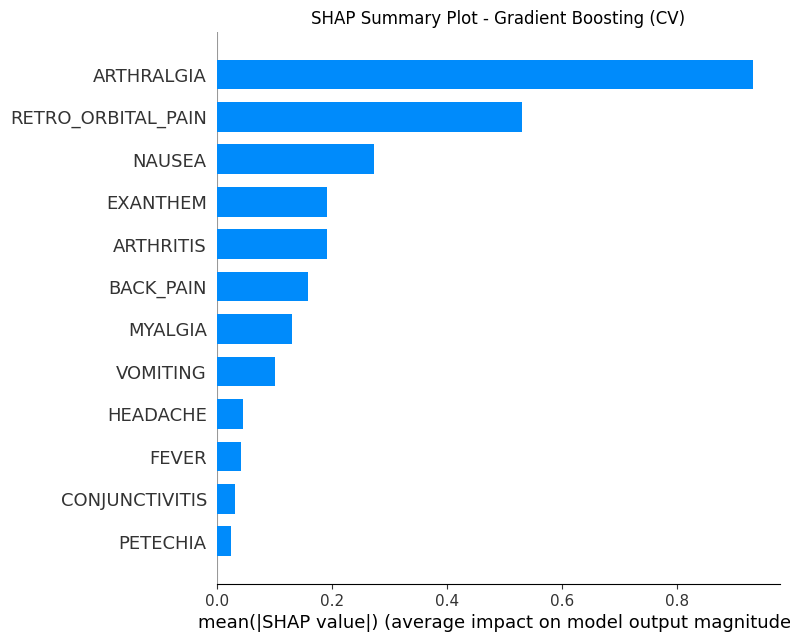

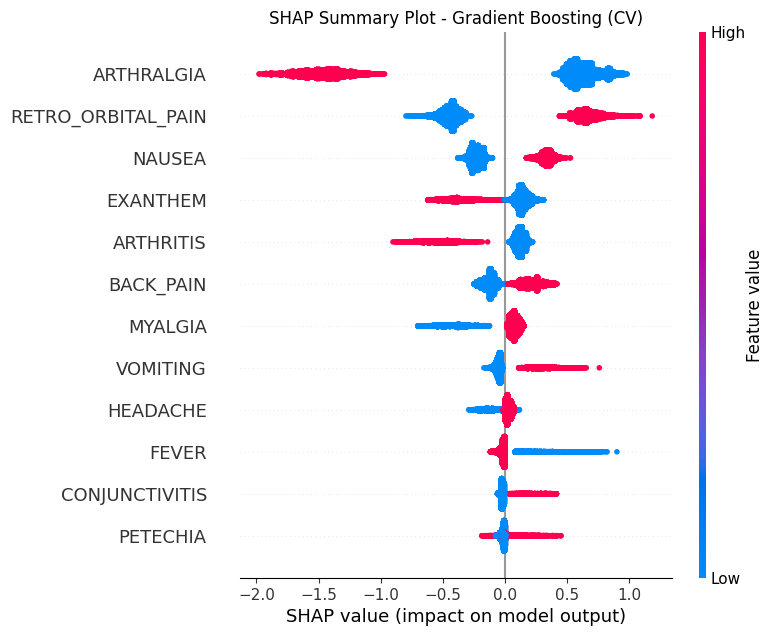

In [17]:
import shap
import matplotlib.pyplot as plt

# Assuming 'shap_values_cv' and 'X_test_cv' have been calculated from your previous steps

# Plot SHAP Summary Bar Plot
shap.summary_plot(shap_values_cv, X_test_cv, plot_type="bar", show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()

# Plot SHAP Summary Beeswarm Plot
shap.summary_plot(shap_values_cv, X_test_cv, show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pickle

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Treinar o modelo com Gradient Boosting
model = GradientBoostingClassifier(random_state=1)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=1)),
    ('model', model)
])

# Realizar a validação cruzada para obter as probabilidades previstas
pipeline.fit(X, y)
y_scores = pipeline.predict_proba(X)[:, 0]  # Probabilidade para chikungunya (classe 0)

# Calcular o threshold que maximiza a sensibilidade para chikungunya
fpr, tpr, thresholds = roc_curve(y, y_scores, pos_label=0)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Salvar o modelo treinado e o threshold
with open('Flask/model/best_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

with open('Flask/model/optimal_threshold.pkl', 'wb') as f:
    pickle.dump(optimal_threshold, f)

 99%|===================| 38576/38952 [00:39<00:00]        

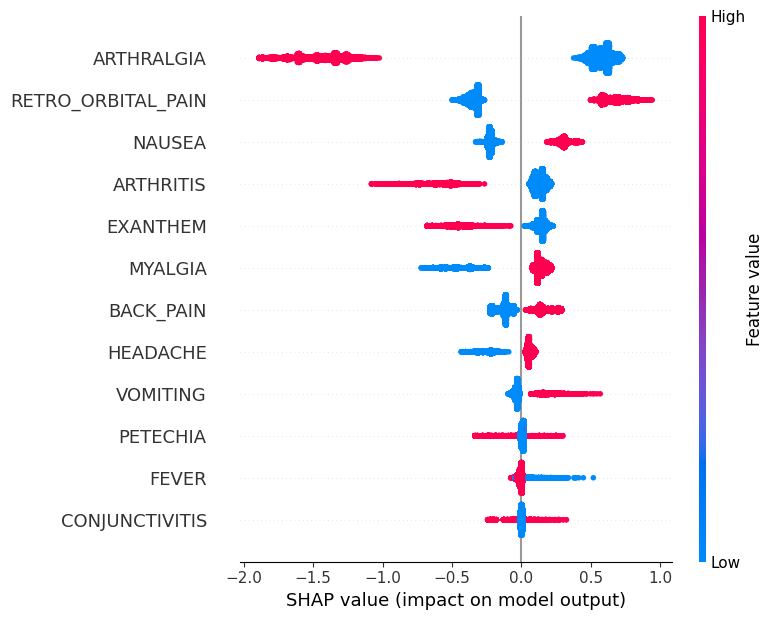

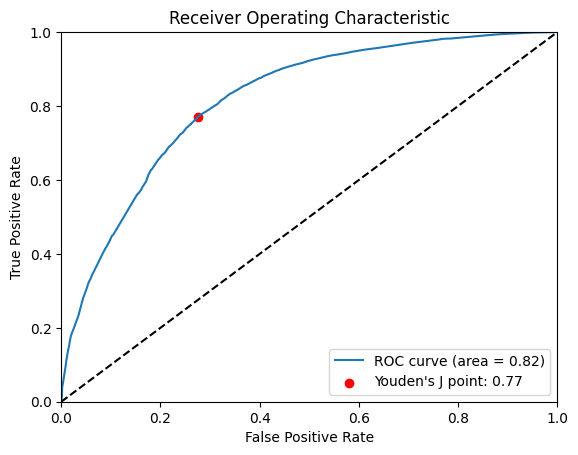

Acurácia: 0.76
Sensibilidade: 0.77
Especificidade: 0.72
Valor Preditivo Positivo (VPP): 0.90
Valor Preditivo Negativo (VPN): 0.51


In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import shap
import pickle
import matplotlib.pyplot as plt

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Treinar o modelo com Gradient Boosting
model = GradientBoostingClassifier(random_state=1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])

# Realizar a validação cruzada para obter as probabilidades previstas
pipeline.fit(X, y)
y_scores = pipeline.predict_proba(X)[:, 1]  # Probabilidade para dengue (classe 1)

# Calcular o threshold que maximiza a sensibilidade para chikungunya
fpr, tpr, thresholds = roc_curve(y, y_scores)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

# Calcular a área sob a curva ROC
roc_auc = roc_auc_score(y, y_scores)

# Calcular métricas no ponto de corte ótimo
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)
accuracy = accuracy_score(y, y_pred_optimal)
cm = confusion_matrix(y, y_pred_optimal)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Salvar o modelo treinado e o threshold
with open('Flask/model/best_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

with open('Flask/model/optimal_threshold.pkl', 'wb') as f:
    pickle.dump(optimal_threshold, f)

# Calcular valores SHAP
explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['scaler'].transform(X))
shap_values = explainer(pipeline.named_steps['scaler'].transform(X))

# Gráfico de resumo dos valores SHAP
shap.summary_plot(shap_values, X)

# Gráfico ROC com Youden's J point
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], c='red', label=f'Youden\'s J point: {optimal_threshold:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Exibir as métricas calculadas
print(f'Acurácia: {accuracy:.2f}')
print(f'Sensibilidade: {sensitivity:.2f}')
print(f'Especificidade: {specificity:.2f}')
print(f'Valor Preditivo Positivo (VPP): {ppv:.2f}')
print(f'Valor Preditivo Negativo (VPN): {npv:.2f}')

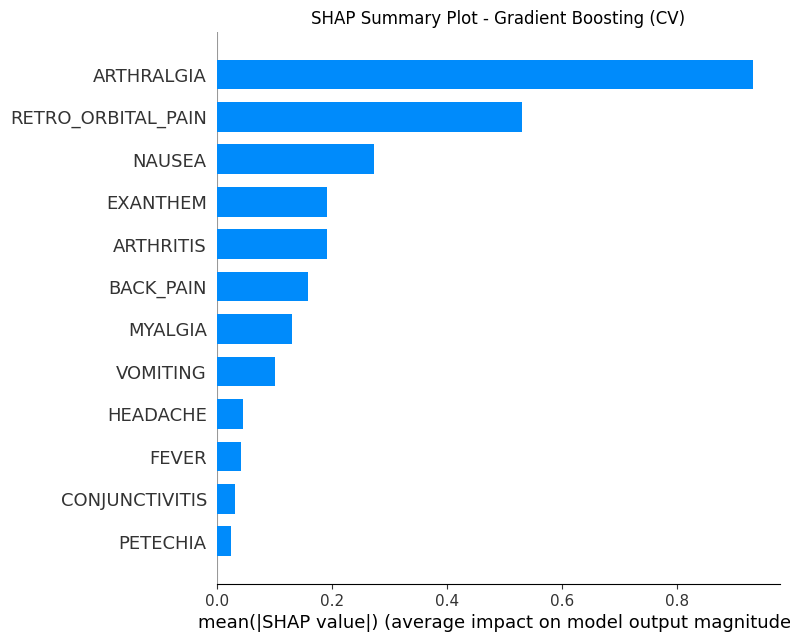

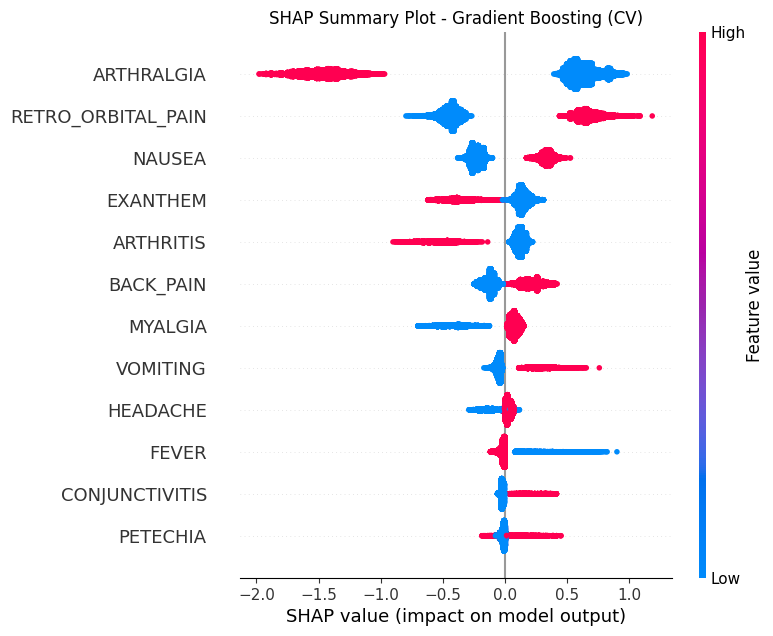

C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


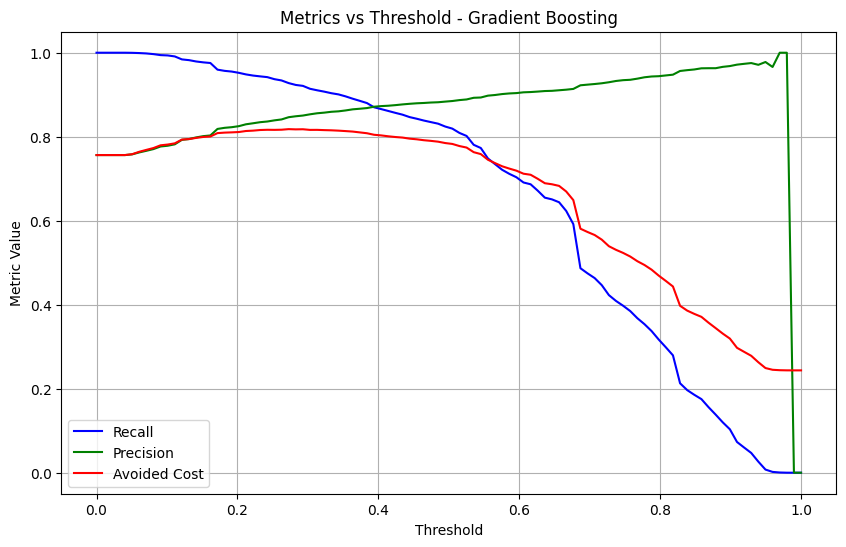

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "Support Vector Machine": SVC(random_state=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Neural Network": MLPClassifier(random_state=1)
}

# Validação cruzada com k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Função para avaliar os modelos e escolher o melhor com base na métrica AUC
def evaluate_models(X, y, models, kf, smote=False):
    model_auc_scores = {}
    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
        
        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
        auc_score = roc_auc_score(y, y_scores)
        model_auc_scores[name] = auc_score
    return model_auc_scores

# Avaliar modelos com SMOTE
model_auc_scores_smote = evaluate_models(X, y, models, kf, smote=False)

# Selecionar o melhor modelo com base na AUC
best_model_name = max(model_auc_scores_smote, key=model_auc_scores_smote.get)
best_model = models[best_model_name]

# Função para calcular os valores SHAP dentro da validação cruzada
def compute_shap_values_cv(pipeline, X, y, kf):
    shap_values_list = []
    X_test_list = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        pipeline.fit(X_train, y_train)
        explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['scaler'].transform(X_train))
        shap_values = explainer(pipeline.named_steps['scaler'].transform(X_test))
        
        shap_values_list.append(shap_values.values)
        X_test_list.append(X_test)
    
    # Concatenate SHAP values and test sets
    shap_values_all = np.concatenate(shap_values_list, axis=0)
    X_test_all = pd.concat(X_test_list, axis=0)
    
    return shap_values_all, X_test_all

# Criar o pipeline final para SHAP
pipeline_shap = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=1)),
    ('model', best_model)
])

shap_values_cv, X_test_cv = compute_shap_values_cv(pipeline_shap, X, y, kf)

# Plotar o gráfico SHAP com validação cruzada
shap.summary_plot(shap_values_cv, X_test_cv, plot_type="bar", show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()
shap.summary_plot(shap_values_cv, X_test_cv, show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()

# Função para plotar métricas vs threshold para o melhor modelo
def plot_metrics_vs_threshold(pipeline, X, y, kf):
    y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
    
    thresholds = np.linspace(0, 1, 100)
    recall_scores = []
    precision_scores = []
    avoided_cost = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall_scores.append(recall_score(y, y_pred))
        precision_scores.append(precision_score(y, y_pred))
        
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        cost = fp + fn  # Exemplary cost function: sum of false positives and false negatives
        avoided_cost.append(1 - cost / len(y))  # Assuming maximum cost is equal to the number of samples

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, recall_scores, label='Recall', color='blue')
    plt.plot(thresholds, precision_scores, label='Precision', color='green')
    plt.plot(thresholds, avoided_cost, label='Avoided Cost', color='red')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics vs Threshold - {best_model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plotar métricas vs threshold para o melhor modelo
plot_metrics_vs_threshold(pipeline_shap, X, y, kf)

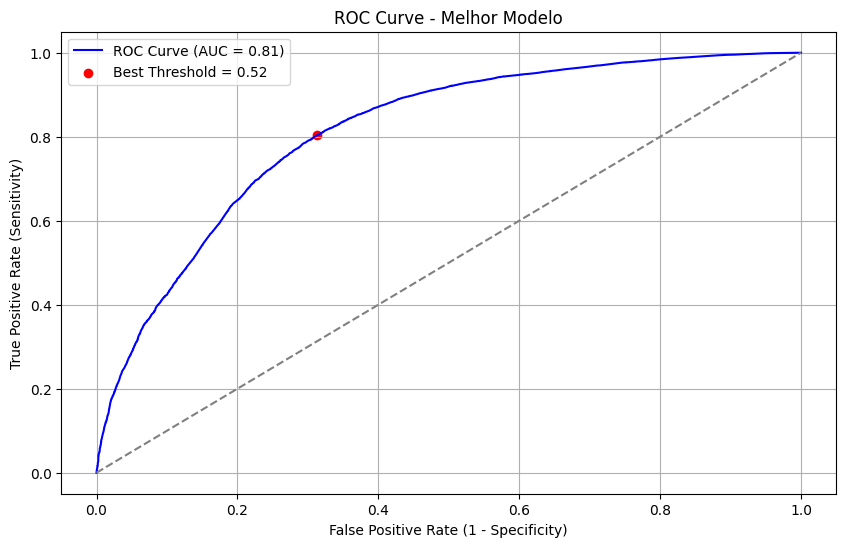

Melhor threshold baseado em Youden's J: 0.52
Sensibilidade (Recall) no melhor threshold: 0.80
Especificidade no melhor threshold: 0.69


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Função para plotar a curva ROC e encontrar o melhor threshold
def plot_roc_curve_with_best_threshold(pipeline, X, y, kf, best_model_name):
    y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    roc_auc = roc_auc_score(y, y_scores)
    
    youdens_j_scores = tpr - fpr
    best_threshold_index = np.argmax(youdens_j_scores)
    best_threshold = thresholds[best_threshold_index]
    best_recall = tpr[best_threshold_index]
    best_specificity = 1 - fpr[best_threshold_index]

    # Plotando a Curva ROC
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold = {best_threshold:.2f}')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    print(f'Melhor threshold baseado em Youden\'s J: {best_threshold:.2f}')
    print(f'Sensibilidade (Recall) no melhor threshold: {best_recall:.2f}')
    print(f'Especificidade no melhor threshold: {best_specificity:.2f}')
    
    return best_threshold

# Exemplo de uso
best_threshold = plot_roc_curve_with_best_threshold(pipeline_shap, X, y, kf, best_model_name='Melhor Modelo')

In [15]:
import joblib

# Treinar o pipeline final no conjunto de dados completo
pipeline_shap.fit(X, y)

# Salvar o pipeline (incluindo o modelo e o scaler)
joblib.dump(pipeline_shap, 'best_model.pkl')

['best_model.pkl']

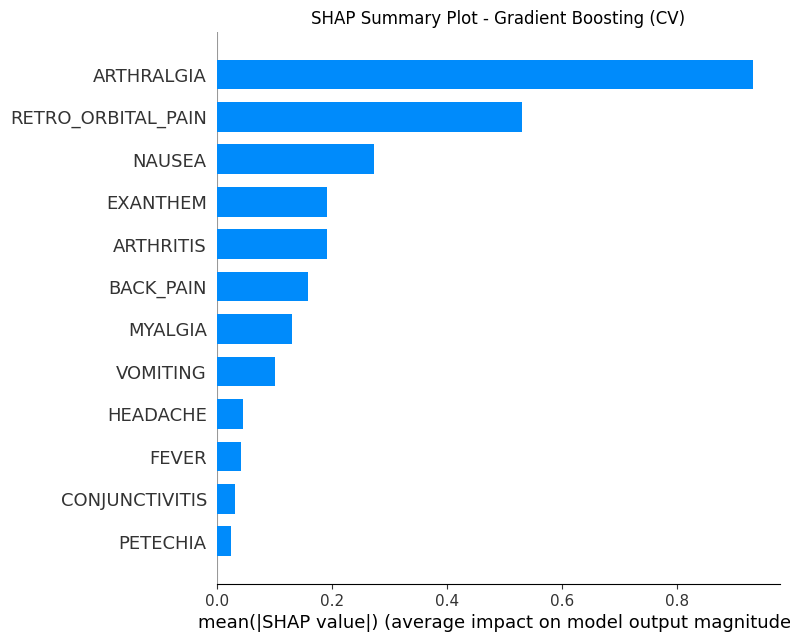

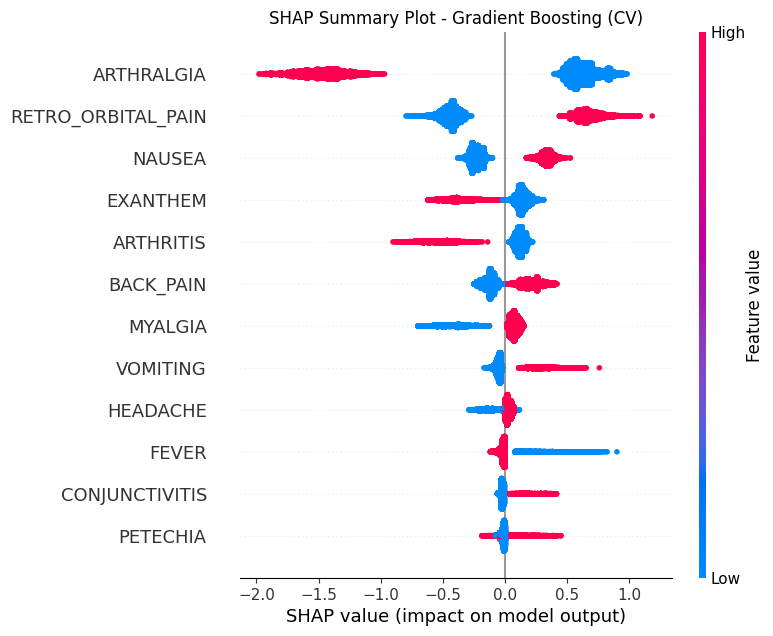

C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victo_cmh09xh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


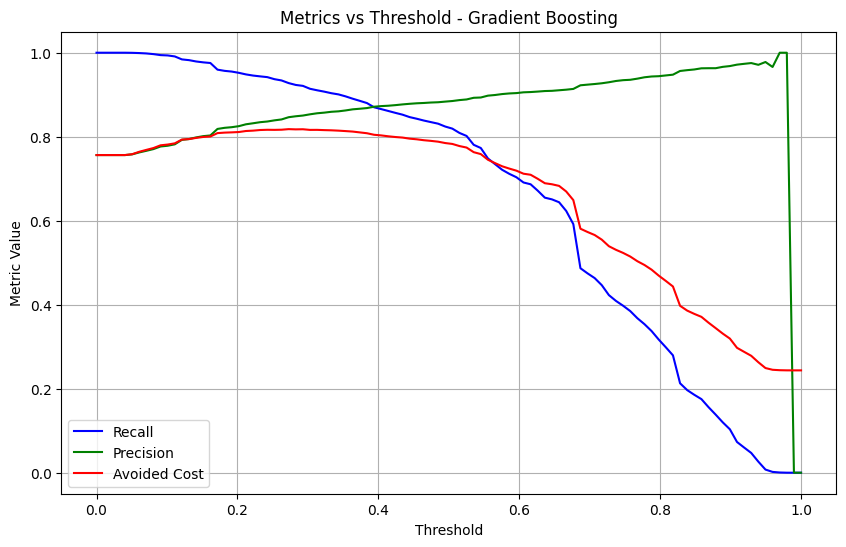

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "Support Vector Machine": SVC(random_state=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Neural Network": MLPClassifier(random_state=1)
}

# Validação cruzada com k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Função para avaliar os modelos e escolher o melhor com base na métrica AUC
def evaluate_models(X, y, models, kf, smote=False):
    model_auc_scores = {}
    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
        
        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
        auc_score = roc_auc_score(y, y_scores)
        model_auc_scores[name] = auc_score
    return model_auc_scores

# Avaliar modelos com SMOTE
model_auc_scores_smote = evaluate_models(X, y, models, kf, smote=False)

# Selecionar o melhor modelo com base na AUC
best_model_name = max(model_auc_scores_smote, key=model_auc_scores_smote.get)
best_model = models[best_model_name]

# Função para calcular os valores SHAP dentro da validação cruzada
def compute_shap_values_cv(pipeline, X, y, kf):
    shap_values_list = []
    X_test_list = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        pipeline.fit(X_train, y_train)
        explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['scaler'].transform(X_train))
        shap_values = explainer(pipeline.named_steps['scaler'].transform(X_test))
        
        shap_values_list.append(shap_values.values)
        X_test_list.append(X_test)
    
    # Concatenate SHAP values and test sets
    shap_values_all = np.concatenate(shap_values_list, axis=0)
    X_test_all = pd.concat(X_test_list, axis=0)
    
    return shap_values_all, X_test_all

# Criar o pipeline final para SHAP
pipeline_shap = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=1)),
    ('model', best_model)
])

shap_values_cv, X_test_cv = compute_shap_values_cv(pipeline_shap, X, y, kf)

# Plotar o gráfico SHAP com validação cruzada
shap.summary_plot(shap_values_cv, X_test_cv, plot_type="bar", show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()
shap.summary_plot(shap_values_cv, X_test_cv, show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()

# Função para plotar métricas vs threshold para o melhor modelo
def plot_metrics_vs_threshold(pipeline, X, y, kf):
    y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
    
    thresholds = np.linspace(0, 1, 100)
    recall_scores = []
    precision_scores = []
    avoided_cost = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall_scores.append(recall_score(y, y_pred))
        precision_scores.append(precision_score(y, y_pred))
        
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        cost = fp + fn  # Exemplary cost function: sum of false positives and false negatives
        avoided_cost.append(1 - cost / len(y))  # Assuming maximum cost is equal to the number of samples

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, recall_scores, label='Recall', color='blue')
    plt.plot(thresholds, precision_scores, label='Precision', color='green')
    plt.plot(thresholds, avoided_cost, label='Avoided Cost', color='red')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics vs Threshold - {best_model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plotar métricas vs threshold para o melhor modelo
plot_metrics_vs_threshold(pipeline_shap, X, y, kf)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.1 MB/s eta 0:00:00
Métricas com SMOTE:
                AUC-ROC  Accuracy  F1 Score Chikungunya  F1 Score Dengue  \
Random Forest  0.737634  0.751461               0.50858         0.833669   

               NPV Chikungunya  NPV Dengue  PPV Chikungunya  PPV Dengue  \
Random Forest         0.451067     0.87127         0.451067     0.87127   

               Recall Chikungunya (Sensitivity)  Recall Dengue (Sensitivity)  \
Random Forest                          0.582901                      0.79918   

               Specificity Chikungunya  Specificity Dengue  
Random Forest                 0.582901             0.79918  

Métricas sem SMOTE:
                AUC-ROC  Accuracy  F1 Score Chikungunya  F1 Score Dengue  \
Random Forest  0.753673  0.800579              0.440575         0.878662   

               NPV Chikungunya  NPV Dengue  PPV Chikungunya  PPV Dengue  \
Random Forest         0.578083    0.835553         0.578083   

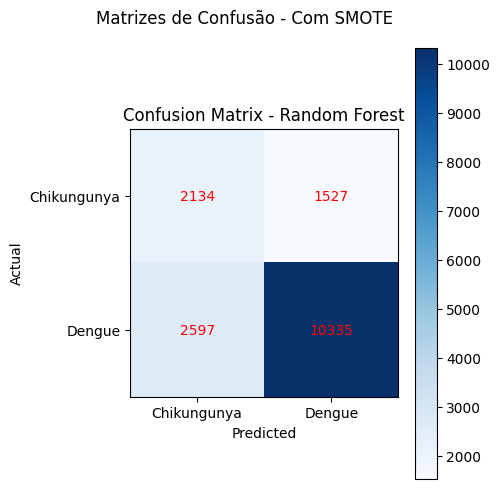

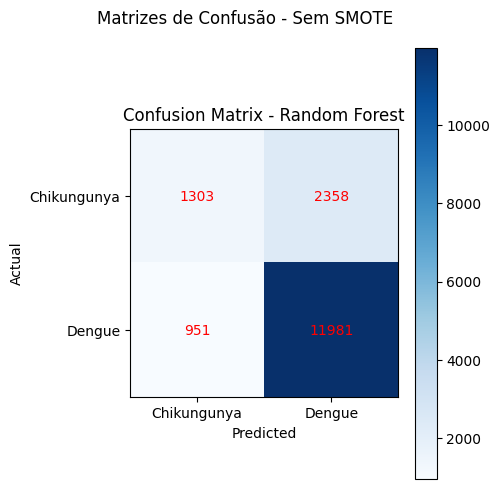

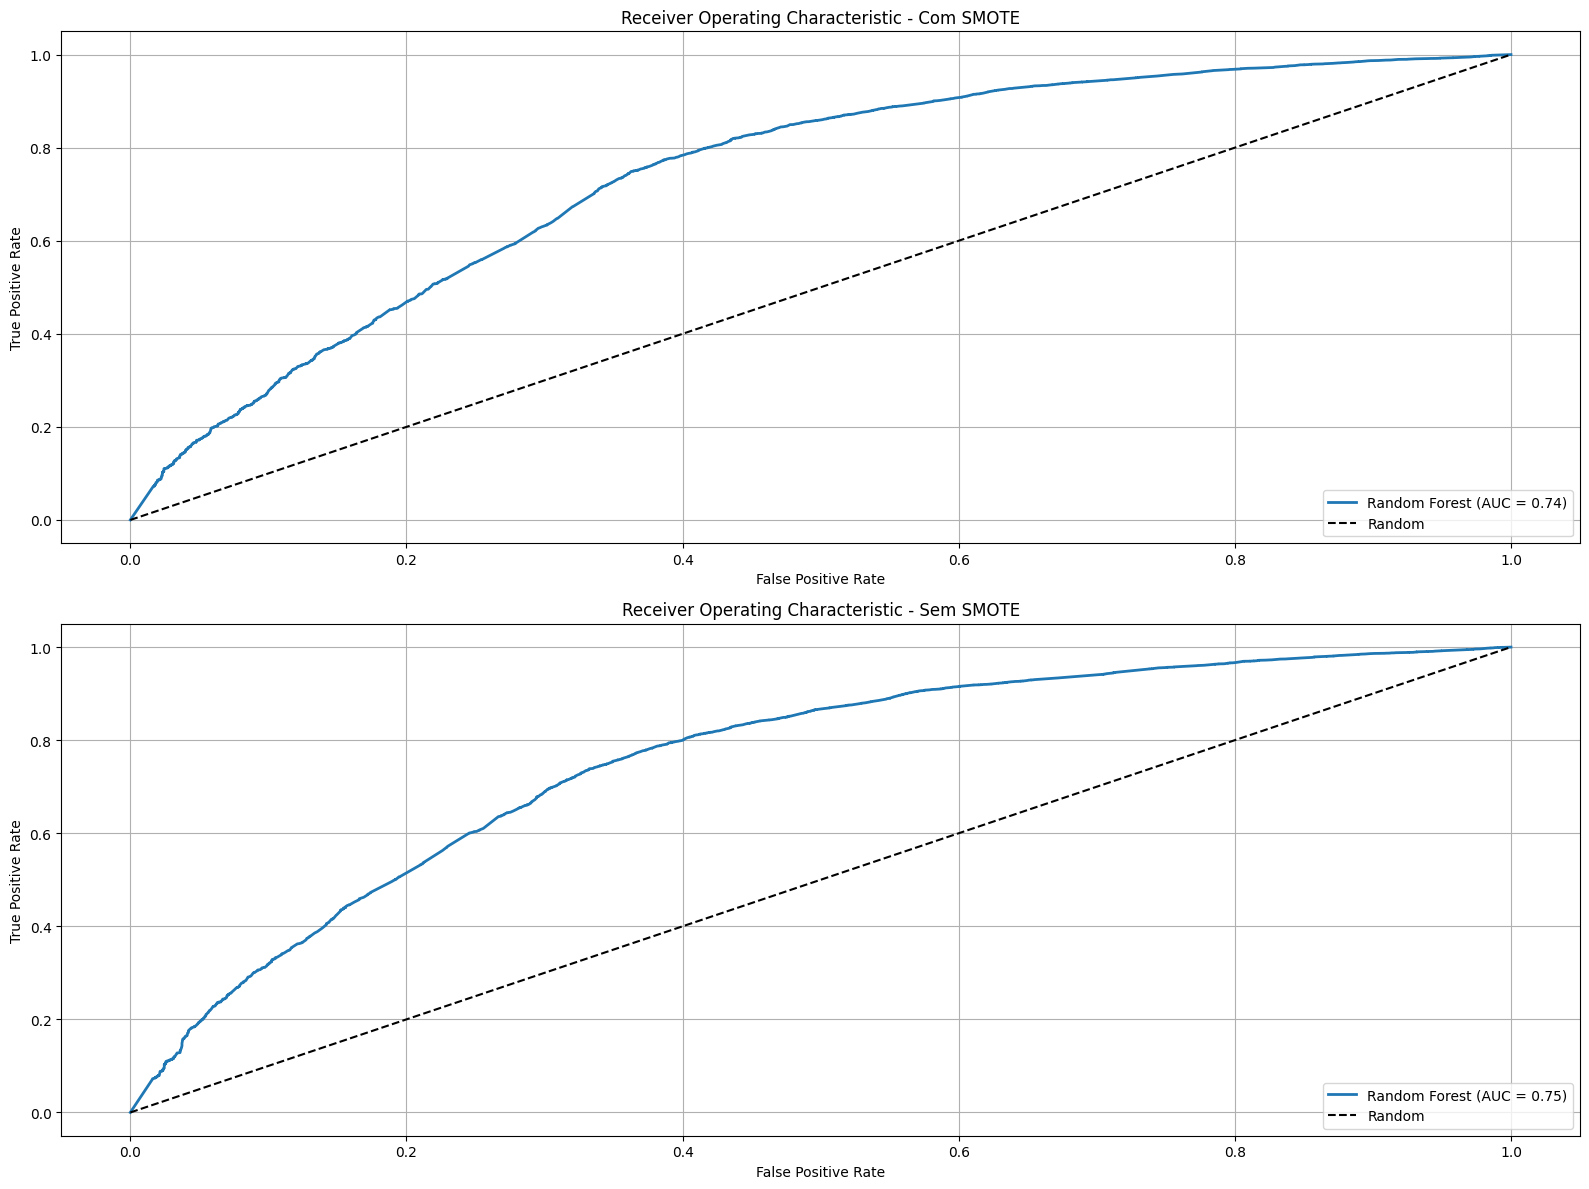

SHAP Values for Random Forest:


 51%|==========          | 16842/33186 [10:22<10:03]       

In [ ]:
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap

# Carregar os dados
caminho_arquivo = '/content/drive/MyDrive/Dengue e Chikungunya/confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Substituir valores em todo o DataFrame
dados.replace({1: 0, 2: 1}, inplace=True)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1)
#    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
#    "Logistic Regression": LogisticRegression(random_state=1),
#    "Support Vector Machine": SVC(random_state=1, probability=True),
#    "K-Nearest Neighbors": KNeighborsClassifier(),
#    "Decision Tree": DecisionTreeClassifier(random_state=1),
#    "Neural Network": MLPClassifier(random_state=1)
}

# Validação cruzada com k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

def evaluate_models(X, y, models, kf, smote=False):
    conf_matrices = {}
    metrics = {}

    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])

        # Previsões com validação cruzada
        y_pred = cross_val_predict(pipeline, X, y, cv=kf)
        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]

        # Matriz de confusão
        conf_matrix = confusion_matrix(y, y_pred)
        conf_matrices[name] = conf_matrix

        # Métricas para Dengue (classe 1)
        accuracy = accuracy_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_scores)
        recall_dengue = recall_score(y, y_pred, pos_label=1)
        specificity_chikungunya = recall_score(y, y_pred, pos_label=0)
        ppv_dengue = precision_score(y, y_pred, pos_label=1)
        npv_chikungunya = precision_score(y, y_pred, pos_label=0)
        f1_dengue = f1_score(y, y_pred, pos_label=1)

        # Métricas para Chikungunya (classe 0)
        recall_chikungunya = recall_score(y, y_pred, pos_label=0)
        specificity_dengue = recall_score(y, y_pred, pos_label=1)
        ppv_chikungunya = precision_score(y, y_pred, pos_label=0)
        npv_dengue = precision_score(y, y_pred, pos_label=1)
        f1_chikungunya = f1_score(y, y_pred, pos_label=0)

        metrics[name] = {
            'Accuracy': accuracy,
            'AUC-ROC': roc_auc,
            'Recall Dengue (Sensitivity)': recall_dengue,
            'Specificity Chikungunya': specificity_chikungunya,
            'PPV Dengue': ppv_dengue,
            'NPV Chikungunya': npv_chikungunya,
            'F1 Score Dengue': f1_dengue,
            'Recall Chikungunya (Sensitivity)': recall_chikungunya,
            'Specificity Dengue': specificity_dengue,
            'PPV Chikungunya': ppv_chikungunya,
            'NPV Dengue': npv_dengue,
            'F1 Score Chikungunya': f1_chikungunya
        }

    return conf_matrices, metrics

# Avaliar modelos com e sem SMOTE
conf_matrices_smote, metrics_smote = evaluate_models(X, y, models, kf, smote=True)
conf_matrices_no_smote, metrics_no_smote = evaluate_models(X, y, models, kf, smote=False)

# Combinar métricas em um DataFrame
metrics_df_smote = pd.DataFrame(metrics_smote).T
metrics_df_no_smote = pd.DataFrame(metrics_no_smote).T

# Salvar as métricas em arquivos CSV
metrics_df_smote.to_csv('metrics_smote.csv')
metrics_df_no_smote.to_csv('metrics_no_smote.csv')

# Exibir tabelas de métricas
print("Métricas com SMOTE:")
print(metrics_df_smote)
print("\nMétricas sem SMOTE:")
print(metrics_df_no_smote)

# Plotar matrizes de confusão
def plot_confusion_matrices(conf_matrices, title):
    num_models = len(conf_matrices)
    fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 5))

    if num_models == 1:
        axes = [axes]

    for i, (name, matrix) in enumerate(conf_matrices.items()):
        ax = axes[i]
        ax.imshow(matrix, cmap='Blues', interpolation='nearest')
        ax.set_title(f'Confusion Matrix - {name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Chikungunya', 'Dengue'])
        ax.set_yticklabels(['Chikungunya', 'Dengue'])
        for j in range(2):
            for k in range(2):
                ax.text(k, j, str(matrix[j, k]), ha='center', va='center', color='red')
        fig.colorbar(ax.imshow(matrix, cmap='Blues'), ax=ax, orientation='vertical')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices_smote, "Matrizes de Confusão - Com SMOTE")
plot_confusion_matrices(conf_matrices_no_smote, "Matrizes de Confusão - Sem SMOTE")

# Plotar curvas ROC
plt.figure(figsize=(16, 12))

# Função de avaliação ROC
def evaluate_roc_curves(models, X, y, kf, smote):
    roc_curves = {}
    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])

        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    return roc_curves

roc_curves_smote = evaluate_roc_curves(models, X, y, kf, smote=True)
roc_curves_no_smote = evaluate_roc_curves(models, X, y, kf, smote=False)

# Com SMOTE
plt.subplot(2, 1, 1)
for name, curve in roc_curves_smote.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Com SMOTE')
plt.legend(loc='lower right')
plt.grid(True)

# Sem SMOTE
plt.subplot(2, 1, 2)
for name, curve in roc_curves_no_smote.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Sem SMOTE')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Avaliação de SHAP values
def shap_evaluation(model, X, y, model_name):
    model.fit(X, y)
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title(f'SHAP Summary Plot - {model_name}')
    plt.show()
    shap.summary_plot(shap_values, X, show=False)
    plt.title(f'SHAP Summary Plot - {model_name}')
    plt.show()

# Avaliar SHAP values para Random Forest e Gradient Boosting
print("SHAP Values for Random Forest:")
shap_evaluation(RandomForestClassifier(random_state=1), X, y, "Random Forest")
print("SHAP Values for Gradient Boosting:")
shap_evaluation(GradientBoostingClassifier(random_state=1), X, y, "Gradient Boosting")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import shap

# Carregar os dados
caminho_arquivo = 'confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "Support Vector Machine": SVC(random_state=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Neural Network": MLPClassifier(random_state=1)
}

# Validação cruzada com k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Função para avaliar os modelos e escolher o melhor com base na métrica AUC
def evaluate_models(X, y, models, kf, smote=False):
    model_auc_scores = {}
    for name, model in models.items():
        if smote:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
        
        y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
        auc_score = roc_auc_score(y, y_scores)
        model_auc_scores[name] = auc_score
    return model_auc_scores

# Avaliar modelos com SMOTE
model_auc_scores_smote = evaluate_models(X, y, models, kf, smote=True)

# Selecionar o melhor modelo com base na AUC
best_model_name = max(model_auc_scores_smote, key=model_auc_scores_smote.get)
best_model = models[best_model_name]

# Função para calcular os valores SHAP dentro da validação cruzada
def compute_shap_values_cv(pipeline, X, y, kf):
    shap_values_list = []
    X_test_list = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        pipeline.fit(X_train, y_train)
        explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['scaler'].transform(X_train))
        shap_values = explainer(pipeline.named_steps['scaler'].transform(X_test))
        
        shap_values_list.append(shap_values.values)
        X_test_list.append(X_test)
    
    # Concatenate SHAP values and test sets
    shap_values_all = np.concatenate(shap_values_list, axis=0)
    X_test_all = pd.concat(X_test_list, axis=0)
    
    return shap_values_all, X_test_all

# Criar o pipeline final para SHAP
pipeline_shap = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=1)),
    ('model', best_model)
])

shap_values_cv, X_test_cv = compute_shap_values_cv(pipeline_shap, X, y, kf)

# Plotar o gráfico SHAP com validação cruzada
shap.summary_plot(shap_values_cv, X_test_cv, plot_type="bar", show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()
shap.summary_plot(shap_values_cv, X_test_cv, show=False)
plt.title(f'SHAP Summary Plot - {best_model_name} (CV)')
plt.show()

# Função para plotar métricas vs threshold para o melhor modelo
def plot_metrics_vs_threshold(pipeline, X, y, kf):
    y_scores = cross_val_predict(pipeline, X, y, cv=kf, method='predict_proba')[:, 1]
    
    thresholds = np.linspace(0, 1, 100)
    recall_scores = []
    precision_scores = []
    avoided_cost = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        recall_scores.append(recall_score(y, y_pred))
        precision_scores.append(precision_score(y, y_pred))
        
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        cost = fp + fn  # Exemplary cost function: sum of false positives and false negatives
        avoided_cost.append(1 - cost / len(y))  # Assuming maximum cost is equal to the number of samples

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, recall_scores, label='Recall', color='blue')
    plt.plot(thresholds, precision_scores, label='Precision', color='green')
    plt.plot(thresholds, avoided_cost, label='Avoided Cost', color='red')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics vs Threshold - {best_model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plotar métricas vs threshold para o melhor modelo
plot_metrics_vs_threshold(pipeline_shap, X, y, kf)

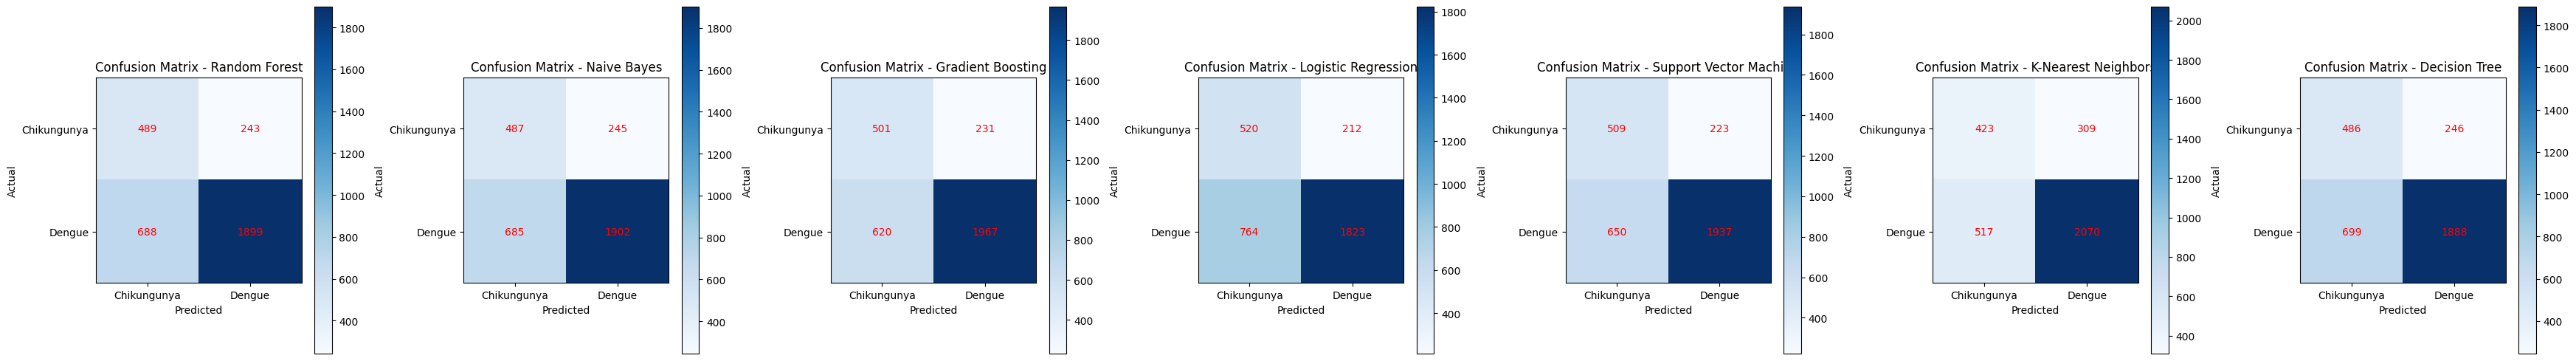

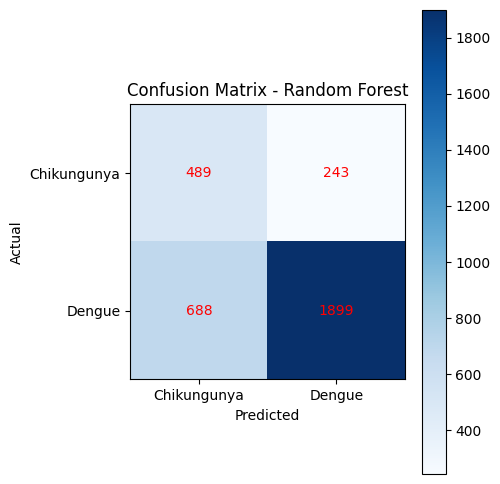

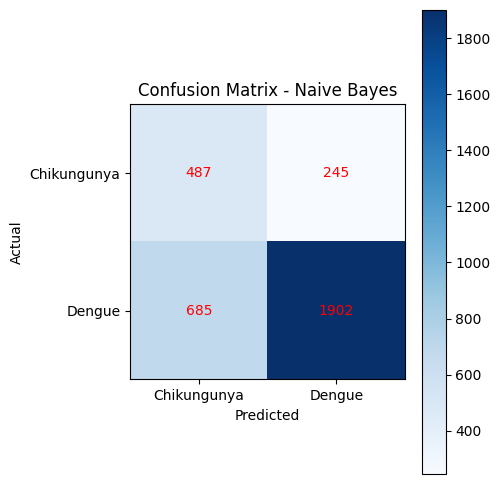

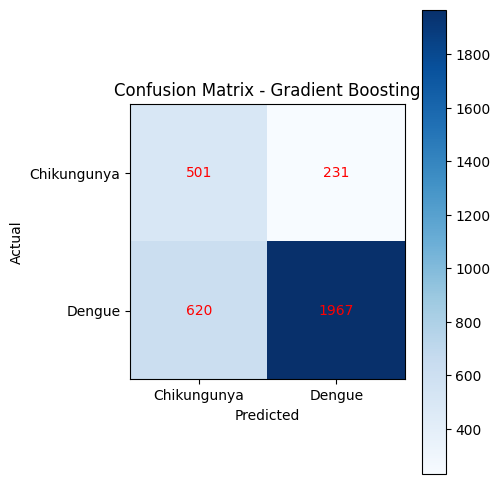

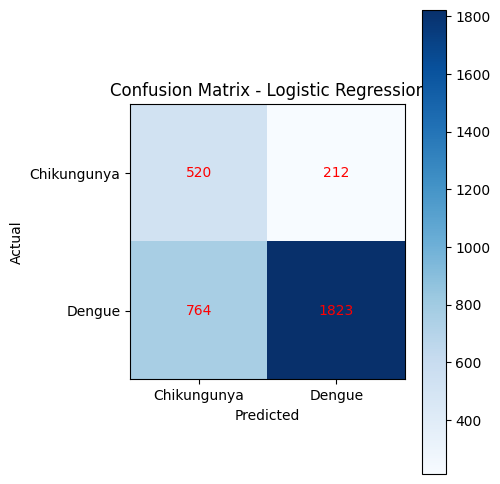

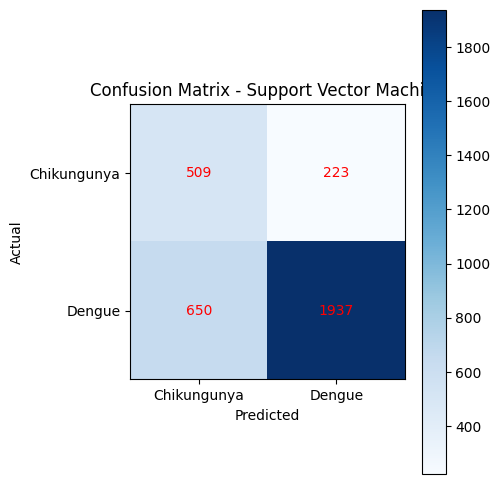

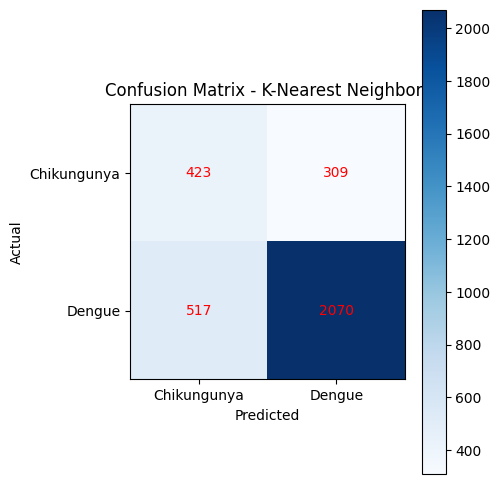

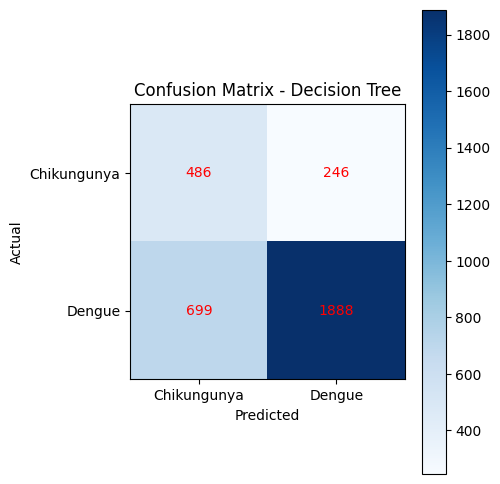

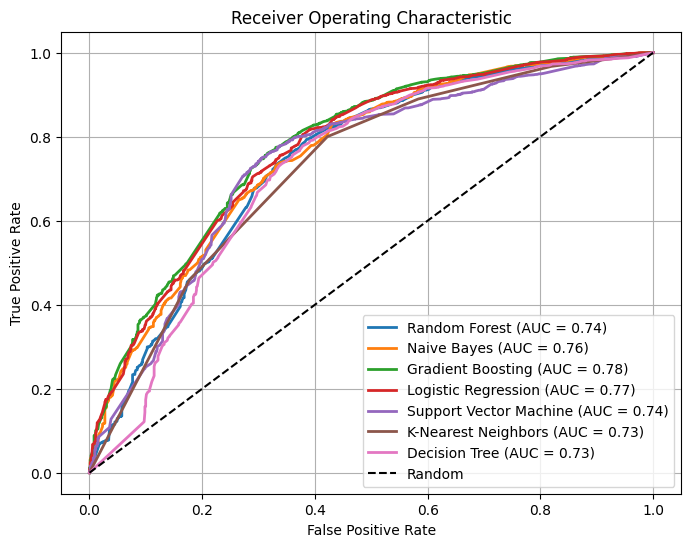

Melhores thresholds encontrados:
Random Forest: 0.5686
Naive Bayes: 0.4828
Gradient Boosting: 0.5113
Logistic Regression: 0.5294
Support Vector Machine: 0.6326
K-Nearest Neighbors: 0.8000
Decision Tree: 0.5696


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, f1_score

# Carregar os dados
caminho_arquivo = '/content/drive/MyDrive/Dengue e Chikungunya/confirmados.csv'  # Seu caminho para o arquivo
dados = pd.read_csv(caminho_arquivo)

# Converter todas as variáveis para categóricas
dados = dados.astype('category')

# Definir dengue como 1 e chikungunya como 0 na coluna TYPE
dados['TYPE'] = dados['TYPE'].map({'DENGUE': 1, 'CHIKUNGUNYA': 0})

# Separar features e target
X = dados.drop('TYPE', axis=1)
y = dados['TYPE']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalizar os dados para todos os modelos exceto CategoricalNB
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling apenas no grupo de treino
ros = RandomOverSampler(random_state=1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Naive Bayes": CategoricalNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "Support Vector Machine": SVC(random_state=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=1)
}

# Validar e avaliar os modelos com oversampling apenas no grupo de treino
conf_matrices = {}
roc_curves = {}

best_thresholds = {}

for name, model in models.items():
    if name == "Naive Bayes":
        # Treinar e prever com CategoricalNB sem normalização
        X_train_resampled_nb, y_train_resampled_nb = ros.fit_resample(X_train, y_train)
        model.fit(X_train_resampled_nb, y_train_resampled_nb)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Treinar outros modelos
        model.fit(X_train_resampled, y_train_resampled)
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calcular curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    # Encontrar o melhor threshold
    f1_scores = 2 * tpr * (1 - fpr) / (tpr + (1 - fpr))
    best_threshold_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_threshold_idx]
    best_thresholds[name] = best_threshold

    # Avaliar o modelo com o melhor threshold encontrado
    y_pred = (y_pred_prob >= best_threshold).astype(int)

    # Matriz de confusão
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Plotar matrizes de confusão com quebras de linha
num_models = len(conf_matrices)
fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 5))

for i, (name, matrix) in enumerate(conf_matrices.items()):
    ax = axes[i]
    ax.imshow(matrix, cmap='Blues', interpolation='nearest')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Chikungunya', 'Dengue'])
    ax.set_yticklabels(['Chikungunya', 'Dengue'])
    for j in range(2):
        for k in range(2):
            ax.text(k, j, str(matrix[j, k]), ha='center', va='center', color='red')
    fig.colorbar(ax.imshow(matrix, cmap='Blues'), ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()

# Para cada matriz de confusão, plote em uma figura separada
for name, matrix in conf_matrices.items():
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(matrix, cmap='Blues', interpolation='nearest')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Chikungunya', 'Dengue'])
    ax.set_yticklabels(['Chikungunya', 'Dengue'])
    for j in range(2):
        for k in range(2):
            ax.text(k, j, str(matrix[j, k]), ha='center', va='center', color='red')
    fig.colorbar(ax.imshow(matrix, cmap='Blues'), ax=ax, orientation='vertical')
    plt.tight_layout()
    plt.show()

# Plotar curvas ROC
plt.figure(figsize=(8, 6))
for name, curve in roc_curves.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f"{name} (AUC = {curve['auc']:.2f})", lw=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Imprimir melhores thresholds encontrados para cada modelo
print("Melhores thresholds encontrados:")
for name, threshold in best_thresholds.items():
    print(f"{name}: {threshold:.4f}")


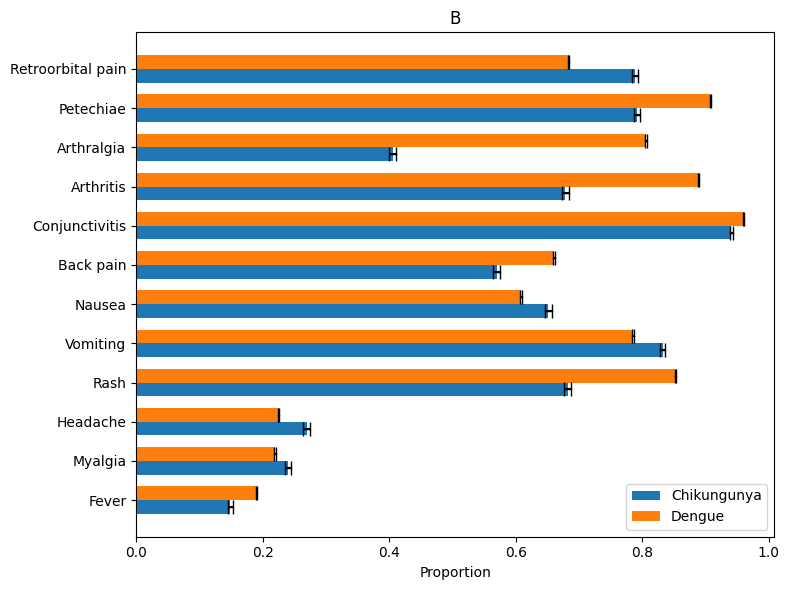

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados das proporções e intervalos de confiança
categorias_pt = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
                 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'DOR_RETRO']
categorias_en = ['Fever', 'Myalgia', 'Headache', 'Rash', 'Vomiting', 'Nausea', 'Back pain',
                 'Conjunctivitis', 'Arthritis', 'Arthralgia', 'Petechiae', 'Retroorbital pain']
proporcoes_chik = [0.1485411, 0.2405059, 0.2691984, 0.681924, 0.8320502, 0.6513877,
                   0.5697095, 0.94048, 0.6784952, 0.4056415, 0.7912273, 0.7879925]
proporcoes_dengue = [0.1903603, 0.2196886, 0.2250893, 0.8521076, 0.7855296, 0.6081559,
                     0.6598656, 0.9599427, 0.8889545, 0.8056375, 0.9071538, 0.6833208]
intervalos_chik = [(0.1445767, 0.1525055), (0.2357417, 0.2452702), (0.2642541, 0.2741427),
                   (0.6767324, 0.6871157), (0.8278831, 0.8362173), (0.6460757, 0.6566998),
                   (0.5641903, 0.5752287), (0.9378426, 0.9431174), (0.6732888, 0.6837016),
                   (0.4001679, 0.411115), (0.7866967, 0.7957579), (0.7834362, 0.7925487)]
intervalos_dengue = [(0.1890996, 0.1916209), (0.218359, 0.2210181), (0.2237482, 0.2264304),
                     (0.8509676, 0.8532475), (0.7842116, 0.7868477), (0.6065883, 0.6097234),
                     (0.6583443, 0.6613869), (0.959313, 0.9605724), (0.8879456, 0.8899634),
                     (0.8043668, 0.8069082), (0.9062219, 0.9080858), (0.681827, 0.6848145)]

# Convertendo intervalos para desvios para o erro das barras
erro_chik = np.array([[prop - intervalo[0], intervalo[1] - prop] for prop, intervalo in zip(proporcoes_chik, intervalos_chik)]).T
erro_dengue = np.array([[prop - intervalo[0], intervalo[1] - prop] for prop, intervalo in zip(proporcoes_dengue, intervalos_dengue)]).T

# Cores adequadas para a revista PLOS
cor_chik = '#1f77b4'  # Azul
cor_dengue = '#ff7f0e'  # Laranja

# Configuração do gráfico
ind = np.arange(len(categorias_en))  # Posições das barras no eixo y
altura = 0.35  # Altura das barras

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(ind - altura/2, proporcoes_chik, altura, xerr=erro_chik, label='Chikungunya', color=cor_chik, capsize=5)
ax.barh(ind + altura/2, proporcoes_dengue, altura, xerr=erro_dengue, label='Dengue', color=cor_dengue, capsize=5)

# Adicionando detalhes ao gráfico
ax.set_xlabel('Proportion')
ax.set_title('B')
ax.set_yticks(ind)
ax.set_yticklabels(categorias_en)
ax.legend(loc='lower right')

# Adicionando linhas horizontais para os intervalos de confiança
for i, categoria in enumerate(categorias_en):
    ax.plot([intervalos_chik[i][0], intervalos_chik[i][1]], [ind[i]-altura/2, ind[i]-altura/2], color='black', linewidth=1)
    ax.plot([intervalos_dengue[i][0], intervalos_dengue[i][1]], [ind[i]+altura/2, ind[i]+altura/2], color='black', linewidth=1)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Assuming conf_matrices is a dictionary where each key-value pair is (name, confusion_matrix)
# Example: conf_matrices = {'Model1': np.array([[tn, fp], [fn, tp]]), 'Model2': np.array([[tn, fp], [fn, tp]])}

metricas = {}

for name, matrix in conf_matrices.items():
    # Positive Predictive Value (PPV)
    ppv_dengue = matrix[1, 1] / (matrix[1, 1] + matrix[0, 1]) if (matrix[1, 1] + matrix[0, 1]) != 0 else np.nan
    ppv_chikungunya = matrix[0, 0] / (matrix[0, 0] + matrix[1, 0]) if (matrix[0, 0] + matrix[1, 0]) != 0 else np.nan

    # Sensitivity (Recall)
    sensibilidade_dengue = matrix[1, 1] / (matrix[1, 0] + matrix[1, 1]) if (matrix[1, 0] + matrix[1, 1]) != 0 else np.nan
    sensibilidade_chikungunya = matrix[0, 0] / (matrix[0, 0] + matrix[0, 1]) if (matrix[0, 0] + matrix[0, 1]) != 0 else np.nan

    # Specificity
    especificidade_dengue = matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]) if (matrix[0, 1] + matrix[0, 0]) != 0 else np.nan
    especificidade_chikungunya = matrix[1, 1] / (matrix[1, 0] + matrix[1, 1]) if (matrix[1, 0] + matrix[1, 1]) != 0 else np.nan

    # Accuracy
    accuracy = (matrix[0, 0] + matrix[1, 1]) / np.sum(matrix) if np.sum(matrix) != 0 else np.nan

    metricas[name] = {
        'Acurácia': accuracy,
        'PPV Dengue': ppv_dengue,
        'PPV Chikungunya': ppv_chikungunya,
        'Sensibilidade Dengue': sensibilidade_dengue,
        'Sensibilidade Chikungunya': sensibilidade_chikungunya,
        'Especificidade Dengue': especificidade_dengue,
        'Especificidade Chikungunya': especificidade_chikungunya
    }

# Display metrics
for name, metrics in metricas.items():
    print(f"Metrics for {name}:")
    print(f"  Acurácia: {metrics['Acurácia']:.2f}")
    print(f"  PPV Dengue: {metrics['PPV Dengue']:.2f}")
    print(f"  PPV Chikungunya: {metrics['PPV Chikungunya']:.2f}")
    print(f"  Sensibilidade Dengue: {metrics['Sensibilidade Dengue']:.2f}")
    print(f"  Sensibilidade Chikungunya: {metrics['Sensibilidade Chikungunya']:.2f}")
    print(f"  Especificidade Dengue: {metrics['Especificidade Dengue']:.2f}")
    print(f"  Especificidade Chikungunya: {metrics['Especificidade Chikungunya']:.2f}")
    print()


Metrics for Random Forest:
  Acurácia: 0.72
  PPV Dengue: 0.89
  PPV Chikungunya: 0.42
  Sensibilidade Dengue: 0.73
  Sensibilidade Chikungunya: 0.67
  Especificidade Dengue: 0.67
  Especificidade Chikungunya: 0.73

Metrics for Naive Bayes:
  Acurácia: 0.72
  PPV Dengue: 0.89
  PPV Chikungunya: 0.42
  Sensibilidade Dengue: 0.74
  Sensibilidade Chikungunya: 0.67
  Especificidade Dengue: 0.67
  Especificidade Chikungunya: 0.74

Metrics for Gradient Boosting:
  Acurácia: 0.74
  PPV Dengue: 0.89
  PPV Chikungunya: 0.45
  Sensibilidade Dengue: 0.76
  Sensibilidade Chikungunya: 0.68
  Especificidade Dengue: 0.68
  Especificidade Chikungunya: 0.76

Metrics for Logistic Regression:
  Acurácia: 0.71
  PPV Dengue: 0.90
  PPV Chikungunya: 0.40
  Sensibilidade Dengue: 0.70
  Sensibilidade Chikungunya: 0.71
  Especificidade Dengue: 0.71
  Especificidade Chikungunya: 0.70

Metrics for Support Vector Machine:
  Acurácia: 0.74
  PPV Dengue: 0.90
  PPV Chikungunya: 0.44
  Sensibilidade Dengue: 0.75
  S

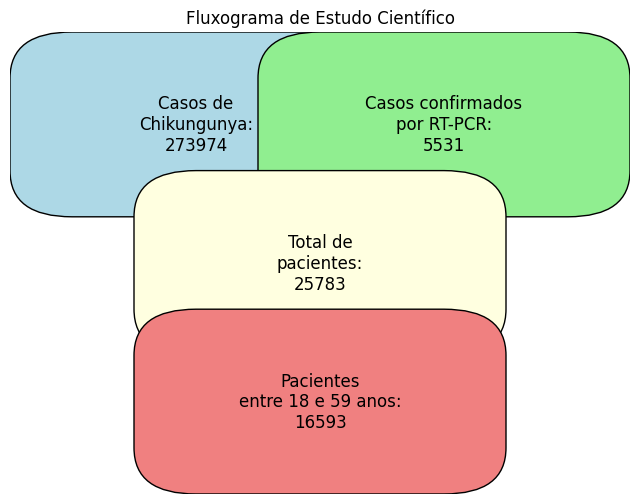

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Dados fornecidos
casos_chikungunya = 273974
confirmados_chikungunya = 5531
casos_dengue = 1393877
confirmados_dengue = 20252
pacientes_total = 25783
pacientes_18_59 = 16593

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Definindo os blocos do fluxograma
casos_rect = mpatches.FancyBboxPatch((0.1, 0.7), 0.4, 0.2, boxstyle="round,pad=0.1", ec="black", fc="lightblue")
confirmados_rect = mpatches.FancyBboxPatch((0.5, 0.7), 0.4, 0.2, boxstyle="round,pad=0.1", ec="black", fc="lightgreen")
total_rect = mpatches.FancyBboxPatch((0.3, 0.4), 0.4, 0.2, boxstyle="round,pad=0.1", ec="black", fc="lightyellow")
idade_rect = mpatches.FancyBboxPatch((0.3, 0.1), 0.4, 0.2, boxstyle="round,pad=0.1", ec="black", fc="lightcoral")

# Adicionando os blocos à figura
plt.gca().add_patch(casos_rect)
plt.gca().add_patch(confirmados_rect)
plt.gca().add_patch(total_rect)
plt.gca().add_patch(idade_rect)

# Adicionando texto dentro dos blocos
plt.text(0.3, 0.8, f"Casos de\nChikungunya:\n{casos_chikungunya}", ha='center', va='center', fontsize=12)
plt.text(0.7, 0.8, f"Casos confirmados\npor RT-PCR:\n{confirmados_chikungunya}", ha='center', va='center', fontsize=12)
plt.text(0.5, 0.5, f"Total de\npacientes:\n{pacientes_total}", ha='center', va='center', fontsize=12)
plt.text(0.5, 0.2, f"Pacientes\nentre 18 e 59 anos:\n{pacientes_18_59}", ha='center', va='center', fontsize=12)

# Removendo eixos para ter uma aparência de fluxograma
plt.axis('off')

# Título do fluxograma
plt.title('Fluxograma de Estudo Científico')

# Exibindo o fluxograma
plt.show()


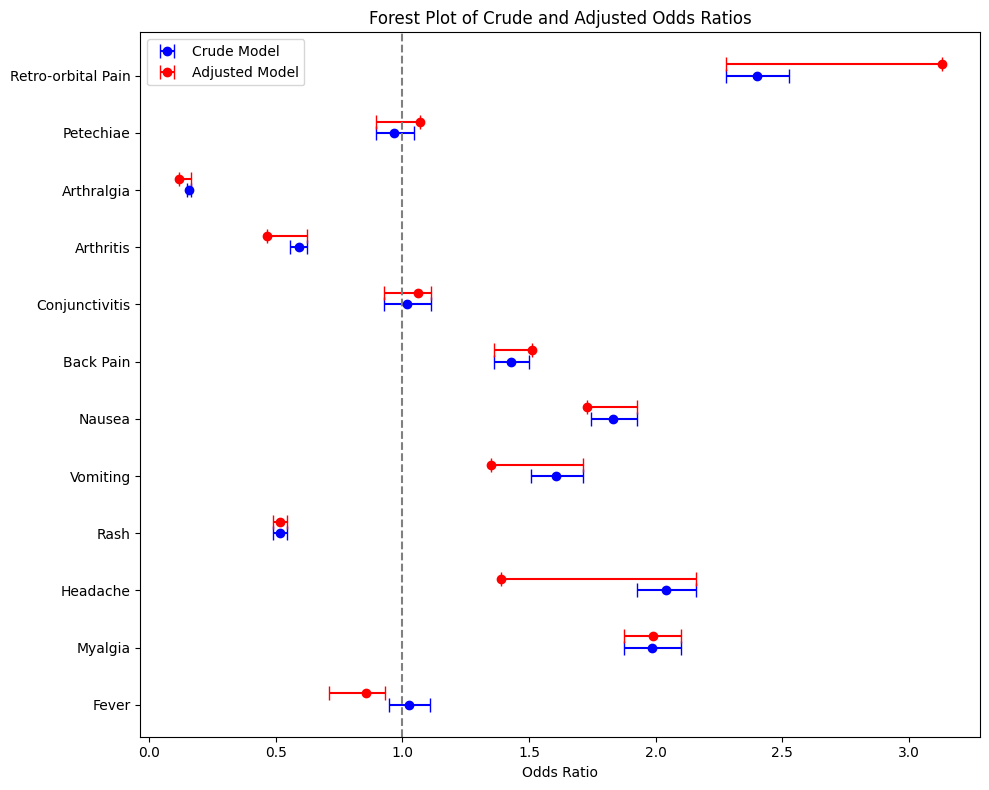